In [1]:
# %%capture
# %reload_ext autoreload
# %autoreload 2
# %cd ..
# %cd src

In [2]:
from pytaa.backtest.returns import get_historical_total_return
from pytaa.tools.data import get_historical_price_data

import pandas as pd

In [3]:
start, end = "2013-01-01", "2023-05-01"

assets = ["SPY", "AGG", "IEF", "GLD", "EEM"]
prices = get_historical_price_data(assets, start, end).loc[:, "Close"]
total_returns = get_historical_total_return(prices, "USD", "total")
price_returns = get_historical_total_return(prices, "USD", "price")

,AGG,EEM,GLD,IEF,SPY
Date,,,,,
2023-04-28,4.0,5.0,2.0,3.0,1.0


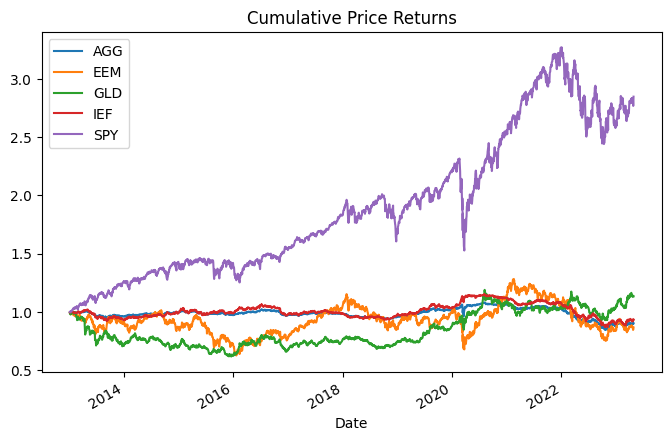

In [9]:
cpr = price_returns.add(1).cumprod()
cpr.plot(figsize=(8,5), title="Cumulative Price Returns")
cpr.tail(1).rank(axis=1, ascending=False)

,AGG,EEM,GLD,IEF,SPY
Date,,,,,
2023-04-28,2.0,5.0,3.0,4.0,1.0


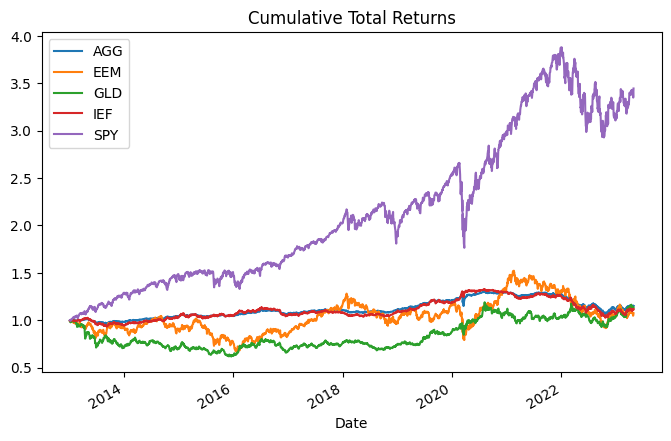

In [12]:
ctr = total_returns.add(1).cumprod()
ctr.plot(figsize=(8,5), title="Cumulative Total Returns")
ctr.tail(1).rank(axis=1, ascending=False)

In [22]:
comp=pd.concat([
    cpr.tail(1).rename({cpr.index[-1]: "Price Return"}),
    ctr.tail(1).rename({ctr.index[-1]: "Total Return"})
])
comp.index.name = ""
comp.mul(100).round(2)

,AGG,EEM,GLD,IEF,SPY
,,,,,
Price Return,90.09,86.53,113.26,93.21,284.77
Total Return,115.01,107.22,113.26,111.57,344.46
